In [19]:
import numpy as np
from matplotlib import pyplot as plt

# schemes = ['ost_2', 'ost_3', 'ost_4', 'ost_5', 'ost_6']
schemes = ['bppn_50', 'bppn_100', 'bppn_150', 'bppn_200', 'bppn_250']
# schemes = ['bppn_10', 'bppn_20', 'bppn_30', 'bppn_40', 'bppn_50']
# schemes = ['mss_128', 'mss_256', 'mss_512', 'mss_1024', 'mss_2048']
# workloads = ["W5_0.1", "W5_0.25", "W5_0.5", "W5_0.75", "W5_1"]
workloads = ["W5_1"]
labels = ["100"]
metrics = ['FCT', 'GOODPUT']

# labels = ['10', '25', '50', '75', '100']
# labels = ['2', '3', '4', '5', '6']

my_figsize = [15, 10]
my_fontsize = 30
WIDTH = 0.03  # the width of the bars
SHORT = 10000 # 100KB
LONG = 10000000 # 1MB

data = {}
for scheme in schemes:
    data[scheme] = {}
    for workload in workloads:
        data[scheme][workload] = {}

for scheme in schemes:
    for workload in workloads:
        for metric in metrics:
            file_name = "../DATA/Zeropod/bppn/{scheme}/DATA_zeropod_{workload}/{metric}.txt".format(scheme=scheme, workload=workload, metric=metric)
            data[scheme][workload][metric] = np.loadtxt(file_name)

for scheme in schemes:
        for workload in workloads:
            data[scheme][workload]['SHORT_IDX'] = data[scheme][workload]['FCT'][:, 4] < SHORT
            data[scheme][workload]['LONG_IDX'] = data[scheme][workload]['FCT'][:, 4] > LONG
            data[scheme][workload]['MIDDLE_IDX'] = (data[scheme][workload]['FCT'][:, 4] >= SHORT) * (data[scheme][workload]['FCT'][:, 4] <= LONG)





{'bppn_50': [31.754736178835717], 'bppn_100': [31.816293309336515], 'bppn_150': [31.556729607322573], 'bppn_200': [31.726406424343484], 'bppn_250': [31.786717799202467]}
{'bppn_50': [3.309065462716901], 'bppn_100': [3.323195119228901], 'bppn_150': [3.303839438608102], 'bppn_200': [3.3246544327713012], 'bppn_250': [3.339651093936101]}
{'bppn_50': [0.6216314587485814], 'bppn_100': [0.8047321931823169], 'bppn_150': [0.8126452550952035], 'bppn_200': [0.9816713021850109], 'bppn_250': [1.0516715340852836]}


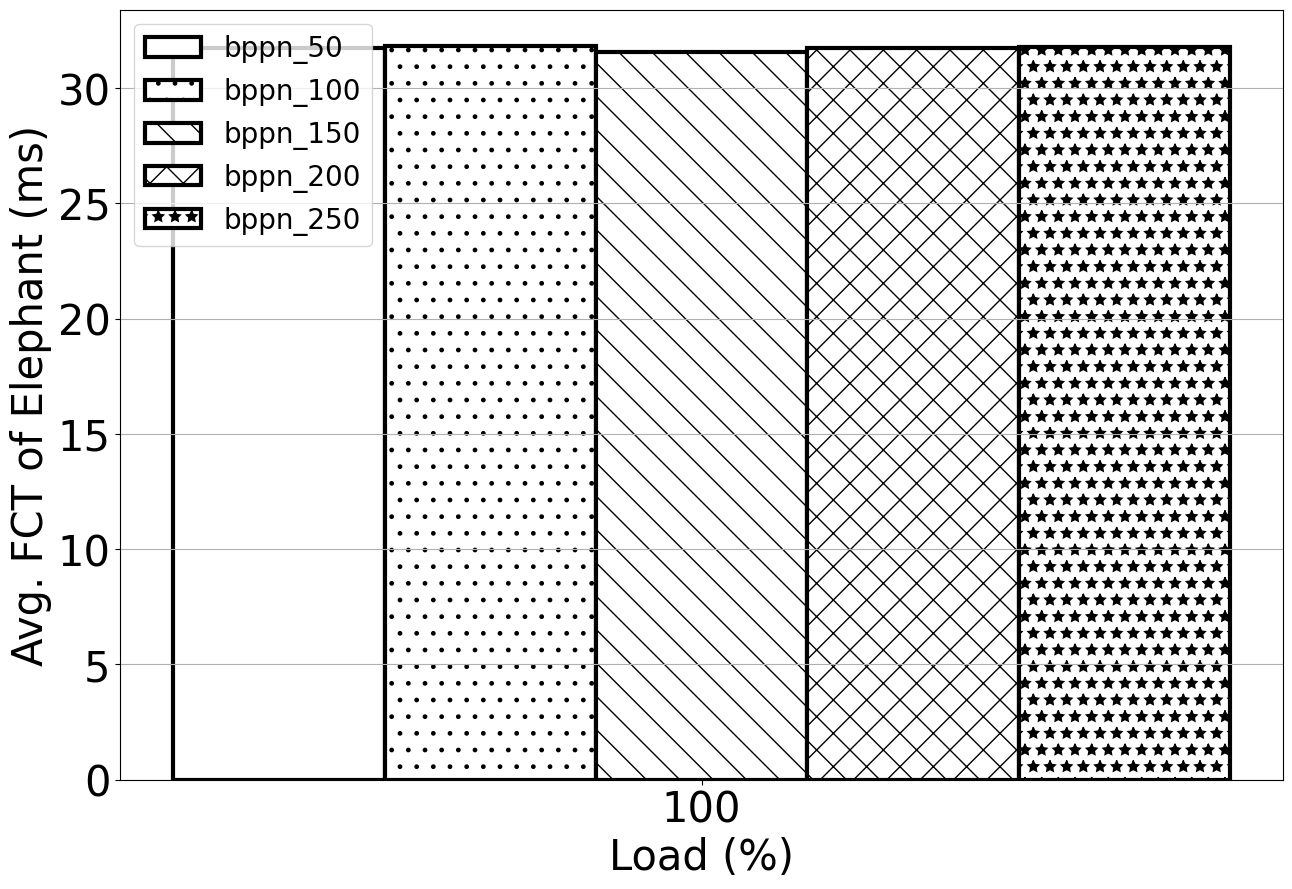

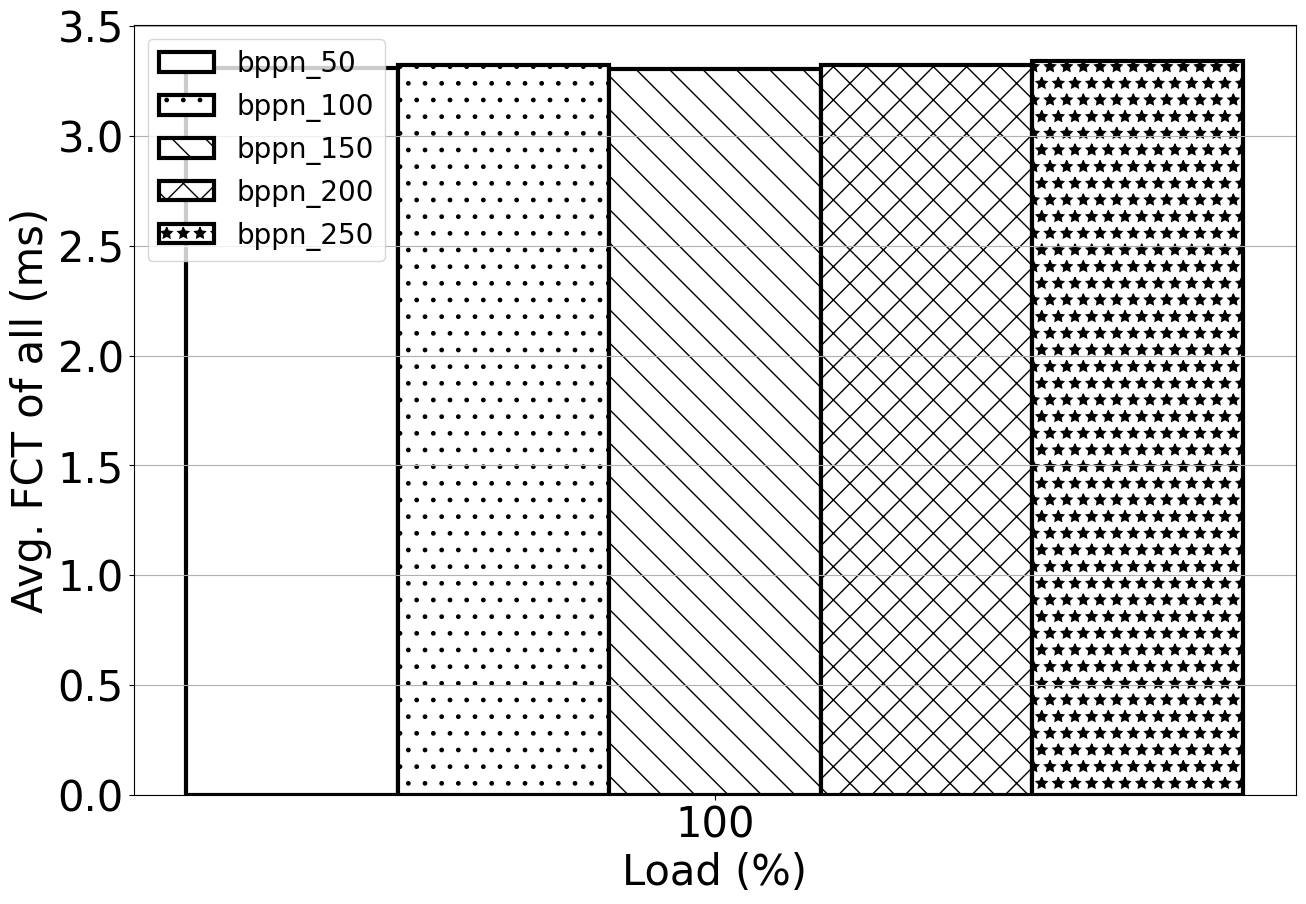

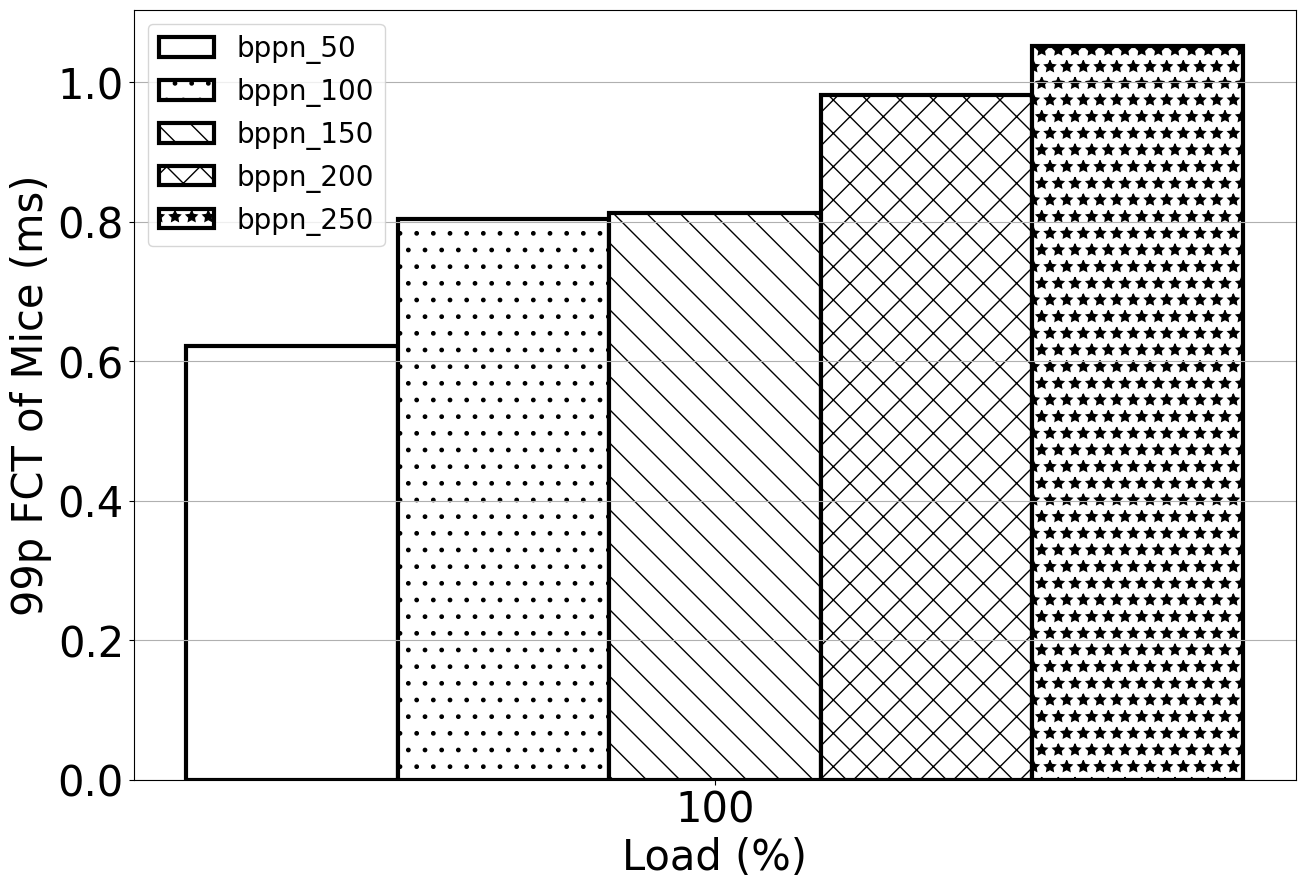

In [20]:
 
fct_bar_plot("Mean", labels, workloads, flow_range='Elephant')
fct_bar_plot("Mean", labels, workloads, flow_range='all')
fct_bar_plot("99p", labels, workloads, flow_range='Mice')

{'bppn_50': [75.16056575053156], 'bppn_100': [75.19809733844335], 'bppn_150': [75.25987656016221], 'bppn_200': [75.23181100156812], 'bppn_250': [75.10081968659263]}


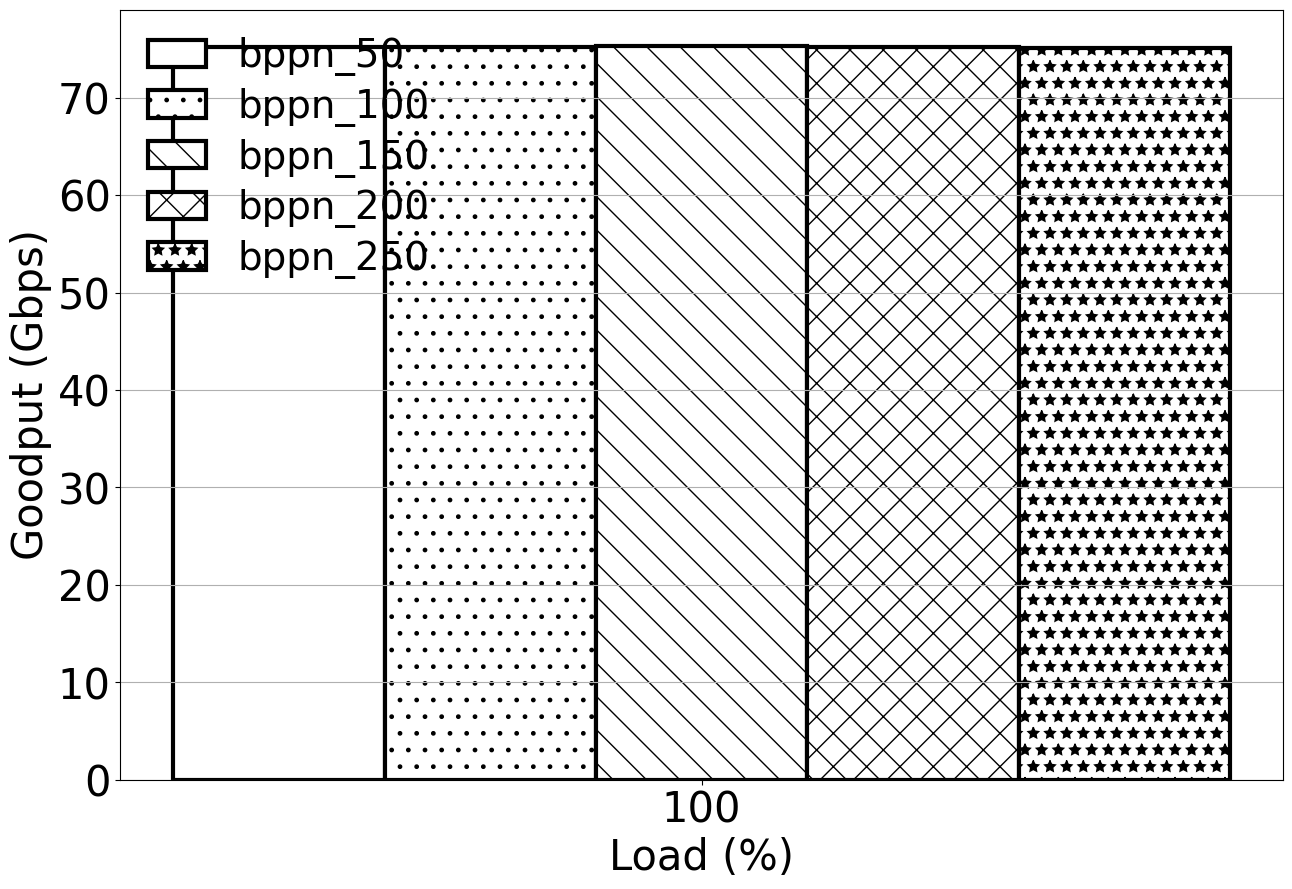

In [21]:
def goodput_bar_plot(labels):
    results = {}
    i = 0
    for scheme in schemes:
        results[scheme] = []
        i = i + 100
        for workload in workloads:
            idx = data[scheme][workload]['GOODPUT'][:, 2] > 0
            goodput = data[scheme][workload]['GOODPUT'][idx, 1] # goodput
            results[scheme].append(np.mean(goodput))
    
    print(results)


    x_tick = np.arange(len(labels))*0.3 # the label locations
    x = x_tick - (len(schemes)-1)*WIDTH/2

    # hatches = ["xxxx", "", "\\\\", "", "////"]
    # colors = ["white", "black", "white", "white", "white"]

    # schemes = ['Ideal', 'Zeropod', 'Fastpass', 'DCTCP']

    hatches = ["", ".", "\\", "x", "*", "|", "o"]
    colors = ["white", "white", "white", "white", "white", "white", "white"]

    # schemes_label = ['OST_2', 'OST_3', 'OST_4', 'OST_5', 'OST_6']
    schemes_label = ['BPPN_50', 'BPPN_100', 'BPPN_150', 'BPPN_200', 'BPPN_250']
    schemes_label = ['BPPN_10', 'BPPN_20', 'BPPN_30', 'BPPN_40', 'BPPN_50']
    schemes_label = schemes



    fig, ax = plt.subplots(figsize=my_figsize)
    
    for i, scheme in enumerate(schemes):
        ax.bar(x + WIDTH*i, results[scheme], WIDTH, edgecolor="black", color=[colors[i]], label=schemes_label[i], hatch=hatches[i], linewidth = 3)

    # ax.set_title('Accelerate by adding line rate', fontsize=my_fontsize)
    # ax.set_ylabel('Normalized Goodput', fontsize=my_fontsize)
    ax.set_ylabel('Goodput (Gbps)', fontsize=my_fontsize)
    ax.set_xticks(x_tick)
    # ax.set_xlabel("Incast Degree", fontsize=my_fontsize)
    ax.set_xlabel("Load (%)", fontsize=my_fontsize)
    ax.set_xticklabels(labels, fontsize=my_fontsize)
    ax.legend(ncol=1, loc = "upper left", fontsize=my_fontsize-2, handlelength = 1.5, borderpad = 0.2,  labelspacing = 0.3, columnspacing = 1.0, frameon=False)

    

    plt.xticks(fontsize=my_fontsize)
    # plt.ylim((0, 1))
    # plt.yticks(np.arange(0,1.01,0.1))
    ax.grid(axis="y")
    plt.yticks(fontsize=my_fontsize)

    figure_path = '../FIGS/Zeropod/goodput1.pdf'
    plt.savefig(figure_path, dpi=300, bbox_inches='tight')

goodput_bar_plot(labels)